Value counts for birth states (USA only):
CA                21
TX                 9
FL                 8
MN                 6
AL                 5
NY                 5
NJ                 5
CT                 4
IL                 4
PA                 4
WA                 3
NC                 3
OR                 3
MS                 3
MO                 3
OH                 3
GA                 2
IA                 2
SC                 2
OK                 2
VA                 2
NV                 2
MA                 2
CO                 2
Fl                 1
Nova Scotia        1
KY                 1
NM                 1
ID                 1
ME                 1
WY                 1
NH                 1
KS                 1
TN                 1
MI                 1
UT                 1
AZ                 1
NE                 1
HI                 1
D.C.               1
IN                 1
MT                 1
North Carolina     1
Name: BirthState, dtype: int64
Average height: 73.40 in

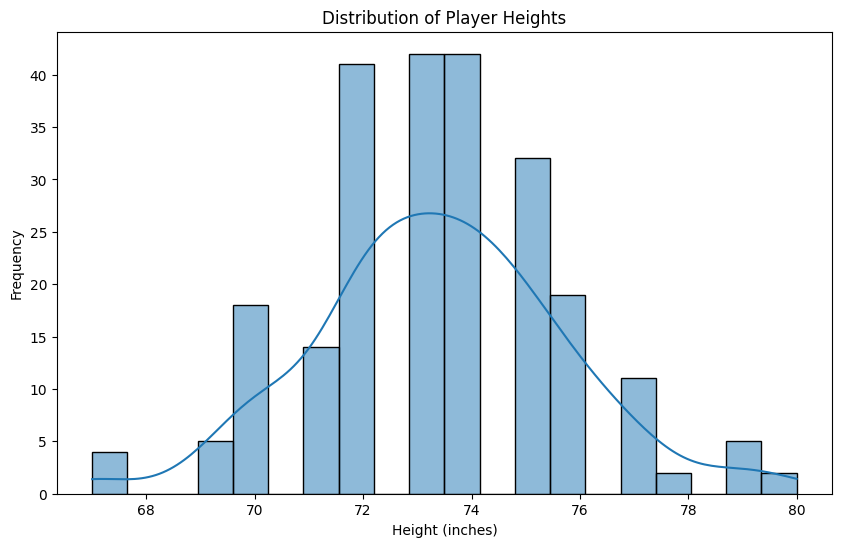

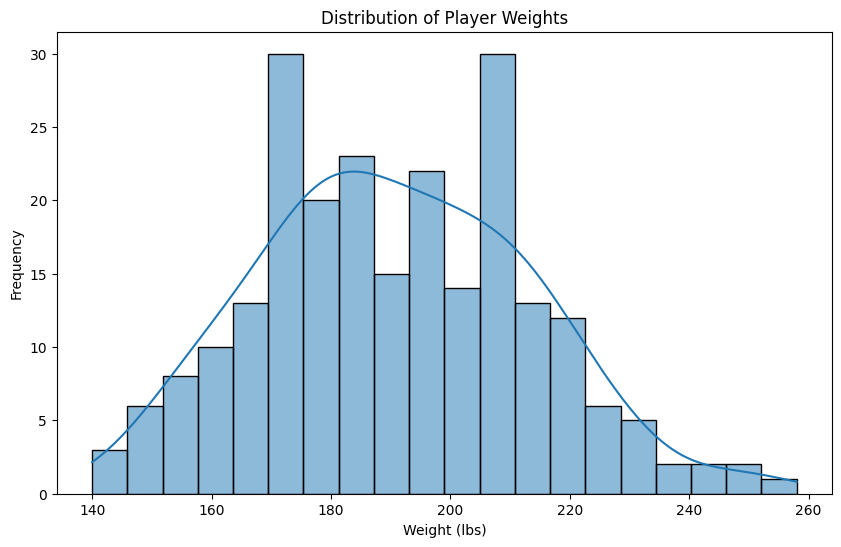

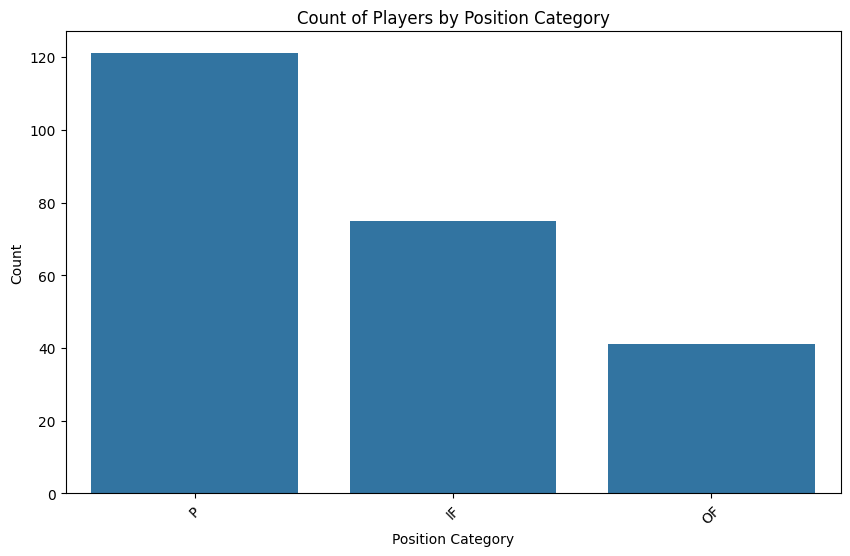

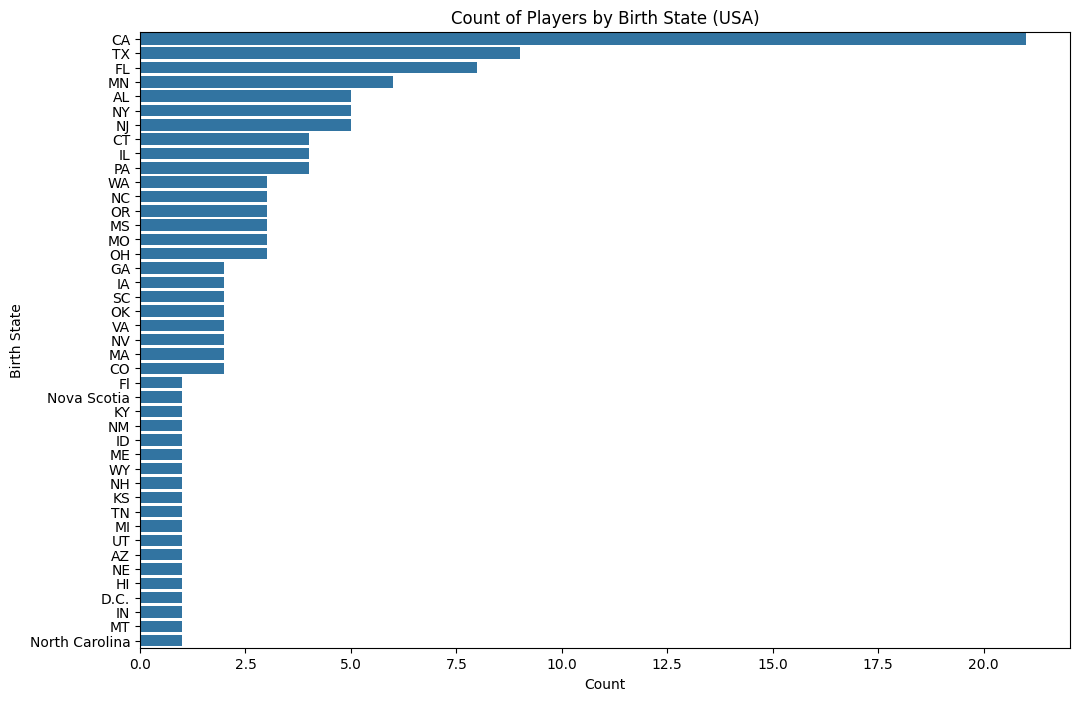

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Load the cleaned data
file_path = os.getenv('CLEANED_DATA_PATH')
if file_path is None:
    raise ValueError("CLEANED_DATA_PATH environment variable not set.")

cleaned_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
cleaned_data.head()

# Calculate value counts for birth states (USA only)
usa_players = cleaned_data[cleaned_data['BirthCountry'] == 'USA']
birth_state_counts = usa_players['BirthState'].value_counts()
print("Value counts for birth states (USA only):")
print(birth_state_counts)

# Calculate the average height and weight of players
average_height = cleaned_data['Height'].mean()
average_weight = cleaned_data['Weight'].mean()
print(f"Average height: {average_height:.2f} inches")
print(f"Average weight: {average_weight:.2f} lbs")

# Plot the distribution of player heights
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Height'], bins=20, kde=True)
plt.title('Distribution of Player Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of player weights
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Weight'], bins=20, kde=True)
plt.title('Distribution of Player Weights')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()

# Plot the count of players by position category
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='PositionCategory', order=cleaned_data['PositionCategory'].value_counts().index)
plt.title('Count of Players by Position Category')
plt.xlabel('Position Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the count of players by birth state (USA only)
plt.figure(figsize=(12, 8))
sns.countplot(data=usa_players, y='BirthState', order=usa_players['BirthState'].value_counts().index)
plt.title('Count of Players by Birth State (USA)')
plt.xlabel('Count')
plt.ylabel('Birth State')
plt.show()

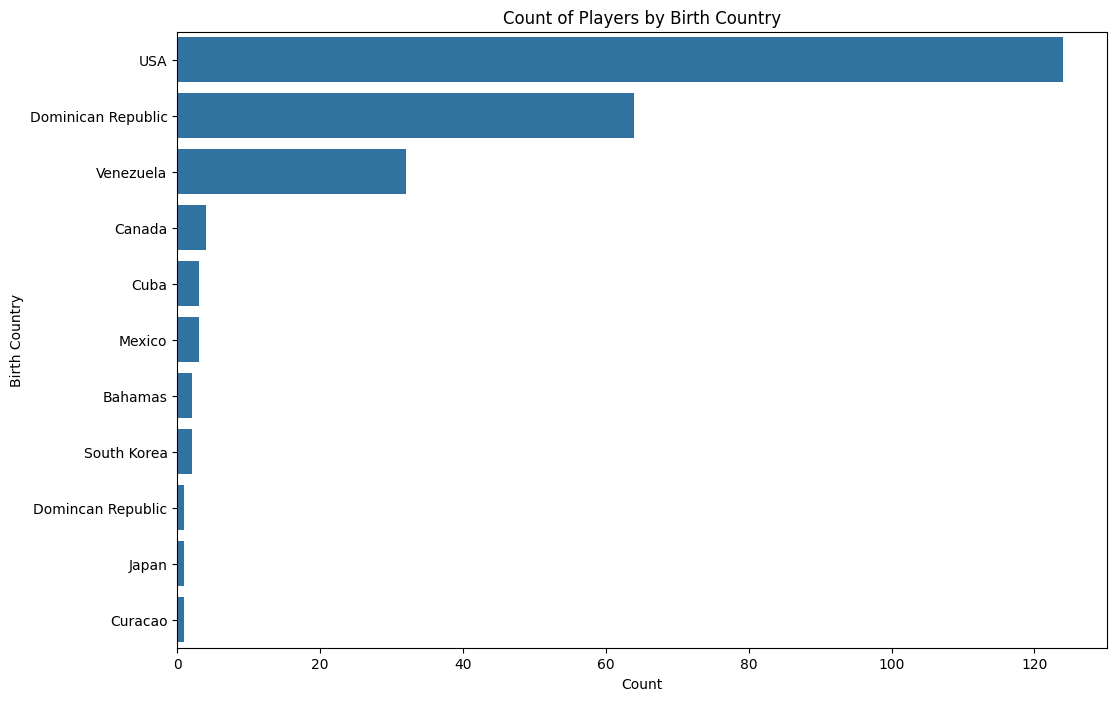

In [2]:
# Example visualization: Count of players by birth country
plt.figure(figsize=(12, 8))
sns.countplot(data=cleaned_data, y='BirthCountry', order=cleaned_data['BirthCountry'].value_counts().index)
plt.title('Count of Players by Birth Country')
plt.xlabel('Count')
plt.ylabel('Birth Country')
plt.show()

In [3]:
cleaned_data['BirthCountry'].value_counts()

USA                   124
Dominican Republic     64
Venezuela              32
Canada                  4
Cuba                    3
Mexico                  3
Bahamas                 2
South Korea             2
Domincan Republic       1
Japan                   1
Curacao                 1
Name: BirthCountry, dtype: int64

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Load the data
marlins_file_path = os.getenv('RAW_DATA_PATH')
all_players_file_path = os.getenv('ALL_PLAYERS_CSV_PATH')

marlins_data = pd.read_csv(marlins_file_path)
all_players_data = pd.read_csv(all_players_file_path)

# Filter data to include only players born in the USA
marlins_usa_players = marlins_data[marlins_data['BirthCountry'] == 'USA'].copy()
all_players_usa = all_players_data[all_players_data['BirthCountry'] == 'USA'].copy()

# Perform value counts of birth states to identify all unique values
marlins_state_counts_raw = marlins_usa_players['BirthState'].value_counts()
all_players_state_counts_raw = all_players_usa['BirthState'].value_counts()

# Print the raw value counts of birth states
print("Raw Marlins Birth State Counts:")
print(marlins_state_counts_raw)
print("\nRaw All Players Birth State Counts:")
print(all_players_state_counts_raw)

# Dictionary to map full state names to abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Standardize birth state names
marlins_usa_players.loc[:, 'BirthState'] = marlins_usa_players['BirthState'].replace(state_abbreviations)
all_players_usa.loc[:, 'BirthState'] = all_players_usa['BirthState'].replace(state_abbreviations)

# Further clean the data to ensure all state names are in abbreviation form
marlins_usa_players.loc[:, 'BirthState'] = marlins_usa_players['BirthState'].str.upper()
all_players_usa.loc[:, 'BirthState'] = all_players_usa['BirthState'].str.upper()

# Perform value counts again after standardization
marlins_state_counts = marlins_usa_players['BirthState'].value_counts()
all_players_state_counts = all_players_usa['BirthState'].value_counts()

# Combine the data into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'MLB Birth State Counts': all_players_state_counts,
    'Marlins Birth State Counts': marlins_state_counts
}).fillna(0)

# Calculate the percentage of Marlins players from each state
comparison_df['Marlins Percentage'] = (comparison_df['Marlins Birth State Counts'] / marlins_state_counts.sum()) * 100

# Sort the DataFrame by MLB Birth State Counts
comparison_df = comparison_df.sort_values(by='MLB Birth State Counts', ascending=False)

# Print the entire comparison DataFrame
pd.set_option('display.max_rows', None)  # Display all rows
print(comparison_df)

# Save the comparison DataFrame to a CSV file for further inspection
comparison_df.to_csv('birth_state_comparison.csv', index=True)

# Perform value counts for high school and college players if relevant columns exist
if 'DraftedOutOf' in marlins_data.columns and 'DraftedOutOf' in all_players_data.columns:
    marlins_usa_players['DraftedOutOf'] = marlins_usa_players['DraftedOutOf'].str.lower()
    all_players_usa['DraftedOutOf'] = all_players_usa['DraftedOutOf'].str.lower()
    
    marlins_drafted_counts = marlins_usa_players['DraftedOutOf'].value_counts()
    all_players_drafted_counts = all_players_usa['DraftedOutOf'].value_counts()
    
    # Print the value counts for high school and college players
    print("\nMarlins Drafted Out Of Counts:")
    print(marlins_drafted_counts)
    print("\nAll Players Drafted Out Of Counts:")
    print(all_players_drafted_counts)
    
    # Combine the data into a single DataFrame for comparison
    drafted_comparison_df = pd.DataFrame({
        'MLB Drafted Out Of Counts': all_players_drafted_counts,
        'Marlins Drafted Out Of Counts': marlins_drafted_counts
    }).fillna(0)
    
    # Calculate the percentage of Marlins players drafted out of each category
    drafted_comparison_df['Marlins Percentage'] = (drafted_comparison_df['Marlins Drafted Out Of Counts'] / marlins_drafted_counts.sum()) * 100
    
    # Sort the DataFrame by MLB Drafted Out Of Counts
    drafted_comparison_df = drafted_comparison_df.sort_values(by='MLB Drafted Out Of Counts', ascending=False)
    
    # Print the entire drafted comparison DataFrame
    print(drafted_comparison_df)
    
    # Save the drafted comparison DataFrame to a CSV file for further inspection
    drafted_comparison_df.to_csv('drafted_comparison.csv', index=True)
else:
    print("\nRelevant columns for drafted out of high school or college not found.")

Raw Marlins Birth State Counts:
CA                21
TX                 9
FL                 8
MN                 6
AL                 5
NY                 5
NJ                 5
CT                 4
IL                 4
PA                 4
WA                 3
NC                 3
OR                 3
MS                 3
MO                 3
OH                 3
GA                 2
SC                 2
OK                 2
VA                 2
MA                 2
NV                 2
CO                 2
IA                 2
KS                 1
Fl                 1
KY                 1
NM                 1
ID                 1
ME                 1
WY                 1
NH                 1
TN                 1
MI                 1
UT                 1
AZ                 1
NE                 1
HI                 1
D.C.               1
IN                 1
MT                 1
North Carolina     1
Name: BirthState, dtype: int64

Raw All Players Birth State Counts:
CA              62

In [5]:
# Perform value counts for high school and college players if relevant columns exist
if 'DraftedOutOf' in marlins_data.columns and 'DraftedOutOf' in all_players_data.columns:
    marlins_usa_players['DraftedOutOf'] = marlins_usa_players['DraftedOutOf'].str.lower()
    all_players_usa['DraftedOutOf'] = all_players_usa['DraftedOutOf'].str.lower()
    
    marlins_drafted_counts = marlins_usa_players['DraftedOutOf'].value_counts()
    all_players_drafted_counts = all_players_usa['DraftedOutOf'].value_counts()
    
    # Print the value counts for high school and college players
    print("\nMarlins Drafted Out Of Counts:")
    print(marlins_drafted_counts)
    print("\nAll Players Drafted Out Of Counts:")
    print(all_players_drafted_counts)
    
    # Combine the data into a single DataFrame for comparison
    drafted_comparison_df = pd.DataFrame({
        'MLB Drafted Out Of Counts': all_players_drafted_counts,
        'Marlins Drafted Out Of Counts': marlins_drafted_counts
    }).fillna(0)
    
    # Calculate the percentage of Marlins players drafted out of each category
    drafted_comparison_df['Marlins Percentage'] = (drafted_comparison_df['Marlins Drafted Out Of Counts'] / marlins_drafted_counts.sum()) * 100
    
    # Sort the DataFrame by MLB Drafted Out Of Counts
    drafted_comparison_df = drafted_comparison_df.sort_values(by='MLB Drafted Out Of Counts', ascending=False)
    
    # Print the entire drafted comparison DataFrame
    print(drafted_comparison_df)
    
    # Save the drafted comparison DataFrame to a CSV file for further inspection
    drafted_comparison_df.to_csv('drafted_comparison.csv', index=True)
else:
    print("\nRelevant columns for drafted out of high school or college not found.")


Relevant columns for drafted out of high school or college not found.


In [6]:
active_players = all_players_data[all_players_data['Status'] == 'Active']

In [7]:
active_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 0 to 6479
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PlayerID                             1207 non-null   int64  
 1   SportsDataID                         0 non-null      float64
 2   Status                               1207 non-null   object 
 3   TeamID                               1207 non-null   int64  
 4   Team                                 1207 non-null   object 
 5   Jersey                               1178 non-null   float64
 6   PositionCategory                     1207 non-null   object 
 7   Position                             1207 non-null   object 
 8   MLBAMID                              1206 non-null   float64
 9   FirstName                            1207 non-null   object 
 10  LastName                             1207 non-null   object 
 11  BatHand                       

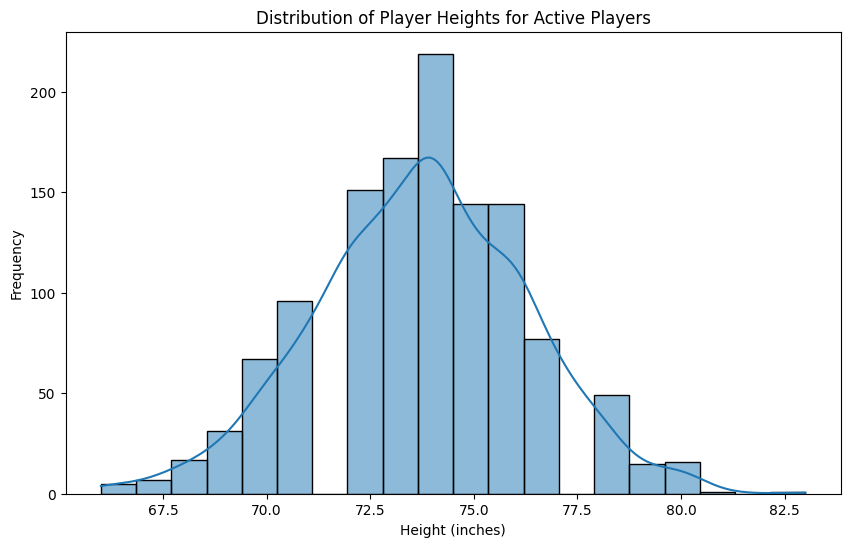

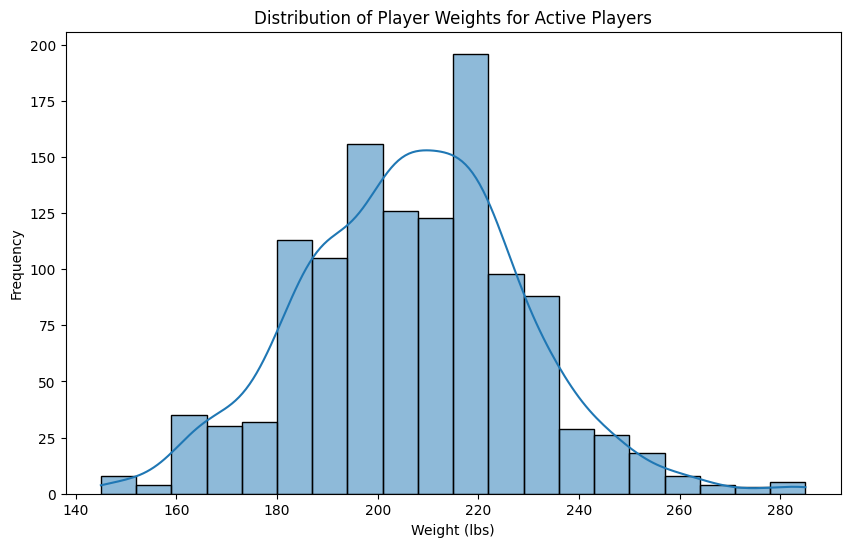

In [8]:
active_players = all_players_data[all_players_data['Status'] == 'Active']
# Example visualization: Distribution of player heights for active Marlins players
plt.figure(figsize=(10, 6))
sns.histplot(active_players['Height'], bins=20, kde=True)
plt.title('Distribution of Player Heights for Active Players')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

# Example visualization: Distribution of player weights for active Marlins players
plt.figure(figsize=(10, 6))
sns.histplot(active_players['Weight'], bins=20, kde=True)
plt.title('Distribution of Player Weights for Active Players')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()


     PlayerID  SportsDataID  Status  TeamID Team  Jersey PositionCategory  \
200  10005191           NaN  Active      22  MIA     7.0               OF   
235  10005448           NaN  Active      22  MIA    22.0                P   
321  10006112           NaN  Active      22  MIA     3.0               OF   
414  10006852           NaN  Active      22  MIA    38.0                P   
494  10007106           NaN  Active      22  MIA    40.0                P   

    Position   MLBAMID FirstName  ...        YahooName GlobalTeamID  \
200       RF  660821.0     Jesús  ...    Jesús Sánchez     10000022   
235       SP  645261.0     Sandy  ...  Sandy Alcantara     10000022   
321       CF  656537.0     Derek  ...       Derek Hill     10000022   
414       RP  622786.0     Jesus  ...     Jesús Tinoco     10000022   
494       SP  615698.0       Cal  ...    Cal Quantrill     10000022   

    FantasyDraftName  FantasyDraftPlayerID  Experience UsaTodayPlayerID  \
200              NaN               

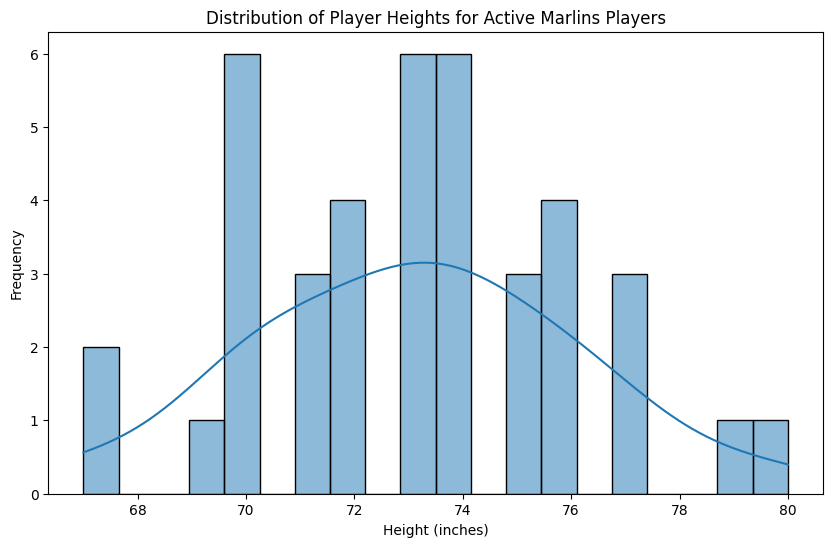

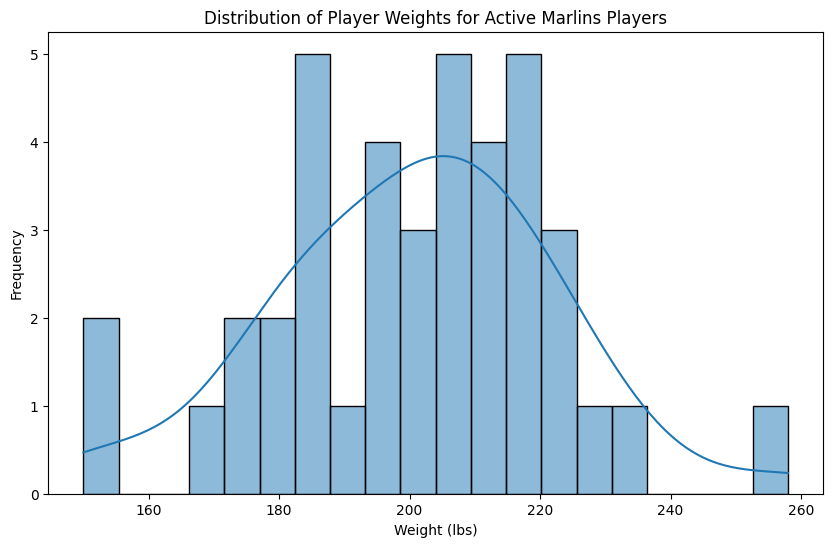

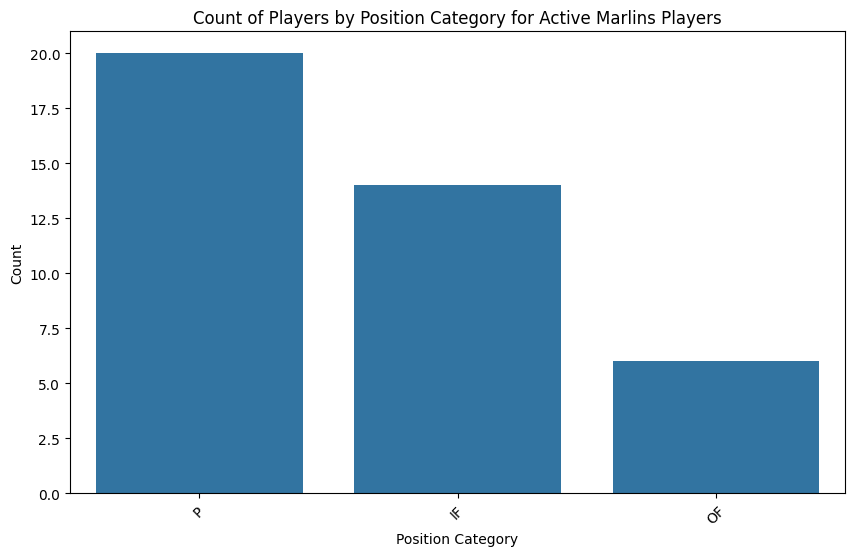

In [9]:
# Filter Marlins players from active players
marlins_active_players = active_players[active_players['Team'] == 'MIA']

# Display the first few rows of the filtered DataFrame
print(marlins_active_players.head())

# Example visualization: Distribution of player heights for active Marlins players
plt.figure(figsize=(10, 6))
sns.histplot(marlins_active_players['Height'], bins=20, kde=True)
plt.title('Distribution of Player Heights for Active Marlins Players')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

# Example visualization: Distribution of player weights for active Marlins players
plt.figure(figsize=(10, 6))
sns.histplot(marlins_active_players['Weight'], bins=20, kde=True)
plt.title('Distribution of Player Weights for Active Marlins Players')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()

# Example visualization: Count of players by position category for active Marlins players
plt.figure(figsize=(10, 6))
sns.countplot(data=marlins_active_players, x='PositionCategory', order=marlins_active_players['PositionCategory'].value_counts().index)
plt.title('Count of Players by Position Category for Active Marlins Players')
plt.xlabel('Position Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

     PlayerID  SportsDataID  Status  TeamID Team  Jersey PositionCategory  \
200  10005191           NaN  Active      22  MIA     7.0               OF   
235  10005448           NaN  Active      22  MIA    22.0                P   
321  10006112           NaN  Active      22  MIA     3.0               OF   
414  10006852           NaN  Active      22  MIA    38.0                P   
494  10007106           NaN  Active      22  MIA    40.0                P   

    Position   MLBAMID FirstName  ... GlobalTeamID FantasyDraftName  \
200       RF  660821.0     Jesús  ...     10000022              NaN   
235       SP  645261.0     Sandy  ...     10000022  Sandy Alcantara   
321       CF  656537.0     Derek  ...     10000022       Derek Hill   
414       RP  622786.0     Jesus  ...     10000022     Jesus Tinoco   
494       SP  615698.0       Cal  ...     10000022    Cal Quantrill   

    FantasyDraftPlayerID  Experience  UsaTodayPlayerID  \
200                  NaN         5.0         8272900

C:\Users\Mitch\AppData\Local\Temp\ipykernel_17336\1553620462.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_players['DraftedOutOf'] = active_players.apply(determine_draft_source, axis=1)


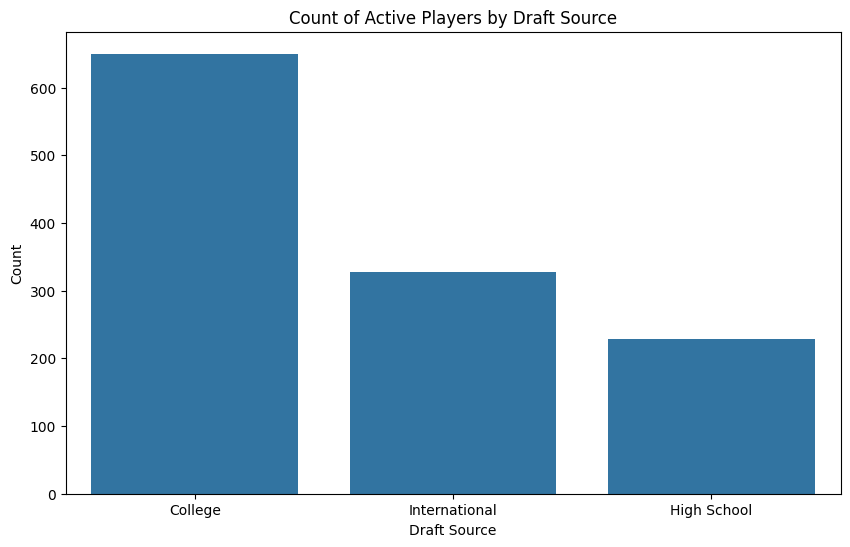

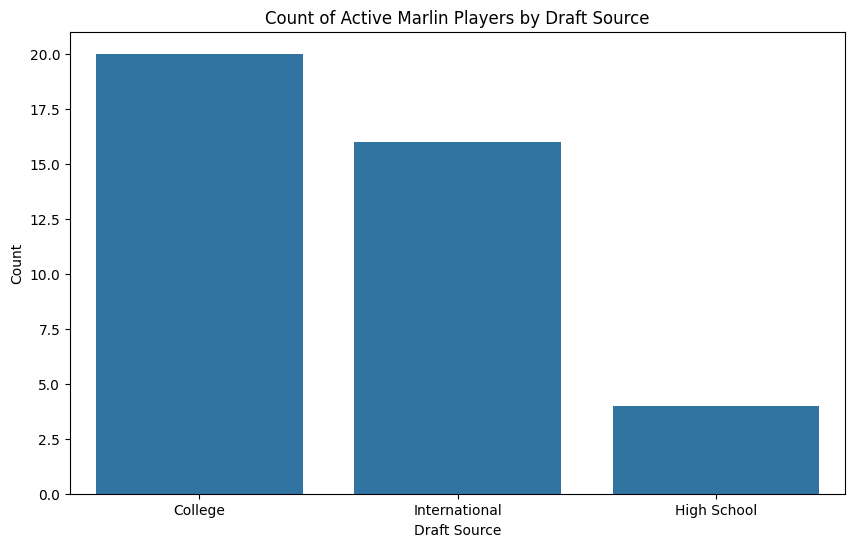

In [10]:
# Create a new column to indicate draft source
def determine_draft_source(row):
    if row['College'] == 'None':
        if row['BirthCountry'] == 'USA':
            return 'High School'
        else:
            return 'International'
    else:
        return 'College'

active_players['DraftedOutOf'] = active_players.apply(determine_draft_source, axis=1)

# Filter Marlins players from active players
marlins_active_players = active_players[active_players['Team'] == 'MIA']

# Display the first few rows of the filtered DataFrame
print(marlins_active_players.head())

# Example visualization: Count of active players by draft source
plt.figure(figsize=(10, 6))
sns.countplot(data=active_players, x='DraftedOutOf', order=active_players['DraftedOutOf'].value_counts().index)
plt.title('Count of Active Players by Draft Source')
plt.xlabel('Draft Source')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=marlins_active_players, x='DraftedOutOf', order=marlins_active_players['DraftedOutOf'].value_counts().index)
plt.title('Count of Active Marlin Players by Draft Source')
plt.xlabel('Draft Source')
plt.ylabel('Count')
plt.show()


In [11]:
print(active_players['DraftedOutOf'].value_counts())
print(marlins_active_players['DraftedOutOf'].value_counts())

College          650
International    328
High School      229
Name: DraftedOutOf, dtype: int64
College          20
International    16
High School       4
Name: DraftedOutOf, dtype: int64


Draft Source Counts and Percentages:
College          650
International    328
High School      229
Name: DraftedOutOf, dtype: int64
College          53.852527
International    27.174814
High School      18.972659
Name: DraftedOutOf, dtype: float64


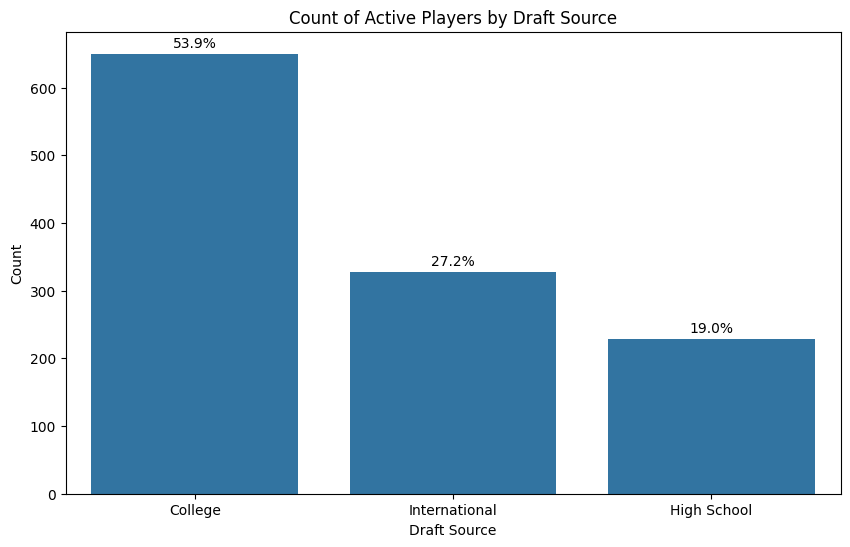

In [12]:
# Calculate the value counts for the DraftedOutOf column
drafted_counts = active_players['DraftedOutOf'].value_counts()

# Calculate the total number of active players
total_active_players = drafted_counts.sum()

# Calculate the percentages
drafted_percentages = (drafted_counts / total_active_players) * 100

# Display the counts and percentages
print("Draft Source Counts and Percentages:")
print(drafted_counts)
print(drafted_percentages)

# Example visualization: Count of active players by draft source with percentages
plt.figure(figsize=(10, 6))
sns.countplot(data=active_players, x='DraftedOutOf', order=drafted_counts.index)
plt.title('Count of Active Players by Draft Source')
plt.xlabel('Draft Source')
plt.ylabel('Count')
for i, count in enumerate(drafted_counts):
    percentage = drafted_percentages[i]
    plt.text(i, count + 10, f'{percentage:.1f}%', ha='center')
plt.show()

Marlins Draft Source Counts and Percentages:
College          20
International    16
High School       4
Name: DraftedOutOf, dtype: int64
College          50.0
International    40.0
High School      10.0
Name: DraftedOutOf, dtype: float64


C:\Users\Mitch\AppData\Local\Temp\ipykernel_17336\2402351500.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marlins_active_players['DraftedOutOf'] = marlins_active_players.apply(determine_draft_source, axis=1)


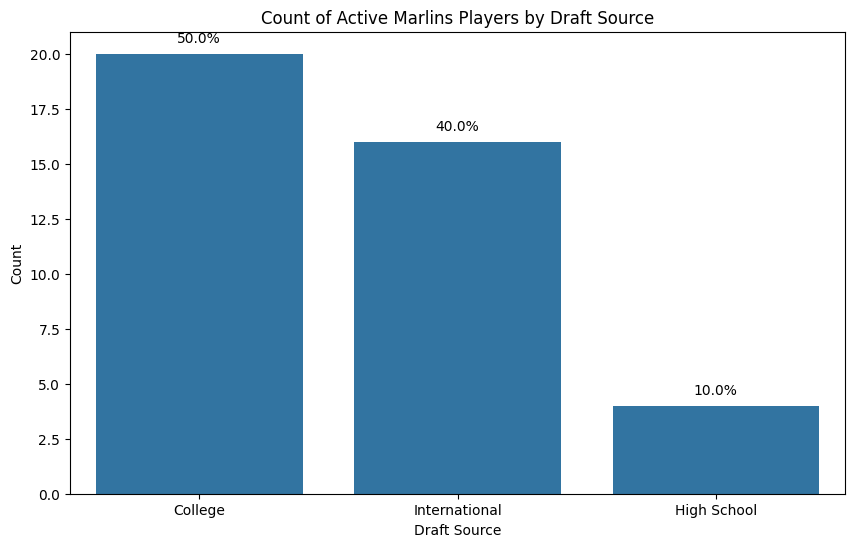

In [13]:
# Ensure the determine_draft_source function is defined
def determine_draft_source(row):
    if row['College'] == 'None':
        if row['BirthCountry'] == 'USA':
            return 'High School'
        else:
            return 'International'
    else:
        return 'College'

# Apply the determine_draft_source function to the Marlins active players DataFrame
marlins_active_players['DraftedOutOf'] = marlins_active_players.apply(determine_draft_source, axis=1)

# Calculate the value counts for the DraftedOutOf column
drafted_counts_marlins = marlins_active_players['DraftedOutOf'].value_counts()

# Calculate the total number of active Marlins players
total_marlins_active_players = drafted_counts_marlins.sum()

# Calculate the percentages
drafted_percentages_marlins = (drafted_counts_marlins / total_marlins_active_players) * 100

# Display the counts and percentages
print("Marlins Draft Source Counts and Percentages:")
print(drafted_counts_marlins)
print(drafted_percentages_marlins)

# Example visualization: Count of active Marlins players by draft source with percentages
plt.figure(figsize=(10, 6))
sns.countplot(data=marlins_active_players, x='DraftedOutOf', order=drafted_counts_marlins.index)
plt.title('Count of Active Marlins Players by Draft Source')
plt.xlabel('Draft Source')
plt.ylabel('Count')
for i, count in enumerate(drafted_counts_marlins):
    percentage = drafted_percentages_marlins[i]
    plt.text(i, count + 0.5, f'{percentage:.1f}%', ha='center')
plt.show()